<a href="https://colab.research.google.com/github/anilsah895/skin_diseases_detection/blob/master/Copy_of_REsearch_Using_a_pre_trained_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')

Base_dir="gdrive/My Drive/Skin_Data1/"#content/gdrive/My Drive/Colab Notebooks/Skin_Data1
train_path = Base_dir+"train"
validation_path = Base_dir+"validation"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
#local_weights_file = "gdrive/My Drive/skindata/vgg16_weights_tf_dim_ordering_tf_kernels.h5"

pre_trained_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

#pre_trained_model.load_weights(local_weights_file)
for layer in pre_trained_model.layers[:11]:
  layer.trainable = False
for layer in pre_trained_model.layers[15:]:
  layer.trainable = False
  
# Print the model summary
pre_trained_model.summary()

Using TensorFlow backend.
W0708 16:05:20.555207 140041645848448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 16:05:20.586995 140041645848448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 16:05:20.595573 140041645848448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 16:05:20.629747 140041645848448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



58892288/58889256 [==============================] - 14s 0us/step


W0708 16:05:34.817353 140041645848448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0708 16:05:34.818397 140041645848448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [3]:
# Check the trainable status of the individual layers
for layer in pre_trained_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f5ddaa93710> False
<keras.layers.convolutional.Conv2D object at 0x7f5db2cad908> False
<keras.layers.convolutional.Conv2D object at 0x7f5db2cad7b8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f5db2cdbac8> False
<keras.layers.convolutional.Conv2D object at 0x7f5db2cdbba8> False
<keras.layers.convolutional.Conv2D object at 0x7f5db248b6a0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f5db24239e8> False
<keras.layers.convolutional.Conv2D object at 0x7f5db2423080> False
<keras.layers.convolutional.Conv2D object at 0x7f5db244c518> False
<keras.layers.convolutional.Conv2D object at 0x7f5db244cef0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f5db23fad68> False
<keras.layers.convolutional.Conv2D object at 0x7f5db23fa3c8> True
<keras.layers.convolutional.Conv2D object at 0x7f5db23aa390> True
<keras.layers.convolutional.Conv2D object at 0x7f5db23bfb70> True
<keras.layers.pooling.MaxPooling2D object at 0x7f5db23d36d8> Tr

In [0]:
#conv_base.summary()
with open(Base_dir+"MODEL_SUMMARY_FILE.text","w") as fh:
    pre_trained_model.summary(print_fn=lambda line: fh.write(line + "\n"))

In [0]:
import tensorflow as tf
# Define a Callback class that stops training once accuracy reaches 98.85%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.9885):
      print("\nReached 98.85% accuracy so cancelling training!")
      self.model.stop_training = True

In [6]:
model = models.Sequential()
model.add(pre_trained_model)
#model.add(layers.Flatten())
#model.last_layer.output()
model.add(layers.Flatten())
model.add(layers.Dropout(0.35))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
#pre_trained_model.trainable = False

model.summary()

W0708 16:06:30.318365 140041645848448 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 18,914,634
Trainable params: 10,099,722
Non-trainable params: 8,814,912
_________________________________________________________________


In [7]:
#from keras import models
from keras.preprocessing.image import ImageDataGenerator
callback1=myCallback()

model.compile(optimizer = optimizers.RMSprop(lr=0.00003, rho=0.9, epsilon=1e-08, decay=0.00001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
# Change the batchsize according to your system RAM
train_batchsize = 64
val_batchsize = 32
 
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(150, 150),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_path,
        target_size=(150, 150),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)


history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1,
callbacks=[callback1])

W0708 16:06:56.931606 140041645848448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Found 4400 images belonging to 10 classes.


W0708 16:07:09.547871 140041645848448 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Found 1100 images belonging to 10 classes.
Epoch 1/100
69/68 [==============================] - 1582s 23s/step - loss: 2.1246 - acc: 0.2421 - val_loss: 1.7722 - val_acc: 0.3927
Epoch 2/100
69/68 [==============================] - 47s 687ms/step - loss: 1.7732 - acc: 0.3893 - val_loss: 1.6988 - val_acc: 0.4245
Epoch 3/100
69/68 [==============================] - 50s 724ms/step - loss: 1.6011 - acc: 0.4512 - val_loss: 1.5101 - val_acc: 0.4809
Epoch 4/100
69/68 [==============================] - 50s 725ms/step - loss: 1.4900 - acc: 0.4881 - val_loss: 1.4739 - val_acc: 0.5136
Epoch 5/100
69/68 [==============================] - 50s 728ms/step - loss: 1.4238 - acc: 0.5205 - val_loss: 1.6167 - val_acc: 0.4764
Epoch 6/100
69/68 [==============================] - 50s 731ms/step - loss: 1.3555 - acc: 0.5393 - val_loss: 1.4416 - val_acc: 0.5255
Epoch 7/100
69/68 [==============================] - 50s 727ms/step - loss: 1.3069 - acc: 0.5578 - val_loss: 1.3634 - val_acc: 0.5409
Epoch 8/100
69/68 [

In [0]:
model.save(Base_dir+'skin_net00100.hdf5')


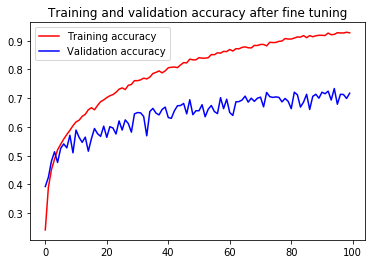

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy after fine tuning')
plt.legend(loc=0)
plt.savefig(Base_dir+"4TRAINING_PLOT_FILE.png", bbox_inches='tight')
plt.savefig(Base_dir+"4TRAINING_PLOT_FILE.png", bbox_inches='tight')

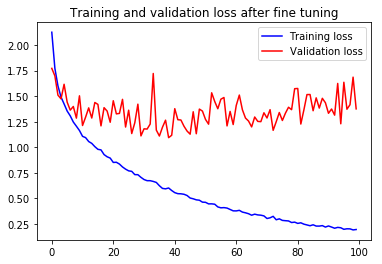

In [10]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss after fine tuning')
plt.legend()
plt.savefig(Base_dir+"4VALIDATION_PLOT_FILE.png", bbox_inches='tight')
plt.savefig(Base_dir+"4VALIDATION_PLOT_FILE.png", bbox_inches='tight')

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 18,914,634
Trainable params: 17,179,146
Non-trainable params: 1,735,488
_________________________________________________________________


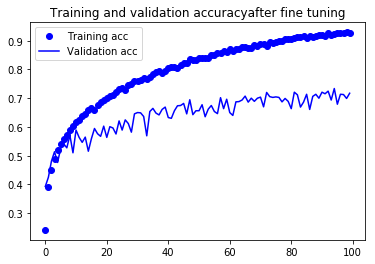

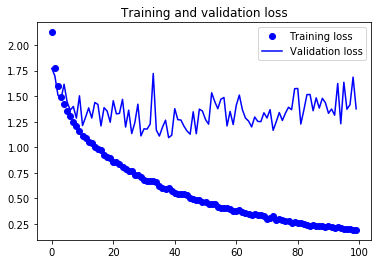

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracyafter fine tuning')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
pre_trained_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
pre_trained_model.trainable = True

set_trainable = False
for layer in pre_trained_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False



In [0]:
model.compile(optimizer = optimizers.RMSprop(lr=0.000003, rho=0.9, epsilon=1e-08, decay=0.00001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 18,914,634
Trainable params: 11,279,370
Non-trainable params: 7,635,264
_________________________________________________________________


In [15]:
callback1=myCallback()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1,
callbacks=[callback1])

Epoch 1/100
69/68 [==============================] - 54s 786ms/step - loss: 0.1385 - acc: 0.9512 - val_loss: 1.4182 - val_acc: 0.7200
Epoch 2/100
69/68 [==============================] - 49s 717ms/step - loss: 0.1107 - acc: 0.9604 - val_loss: 1.4709 - val_acc: 0.7318
Epoch 3/100
69/68 [==============================] - 49s 717ms/step - loss: 0.1069 - acc: 0.9600 - val_loss: 1.5047 - val_acc: 0.7209
Epoch 4/100
69/68 [==============================] - 50s 718ms/step - loss: 0.1053 - acc: 0.9611 - val_loss: 1.4828 - val_acc: 0.7173
Epoch 5/100
69/68 [==============================] - 50s 725ms/step - loss: 0.1122 - acc: 0.9592 - val_loss: 1.4925 - val_acc: 0.7264
Epoch 6/100
69/68 [==============================] - 50s 719ms/step - loss: 0.1029 - acc: 0.9602 - val_loss: 1.4830 - val_acc: 0.7300
Epoch 7/100
69/68 [==============================] - 49s 716ms/step - loss: 0.1023 - acc: 0.9614 - val_loss: 1.5336 - val_acc: 0.7227
Epoch 8/100
69/68 [==============================] - 50s 719ms

In [0]:
model.save(Base_dir+'skin_net_after_fineTuning050.hdf5')


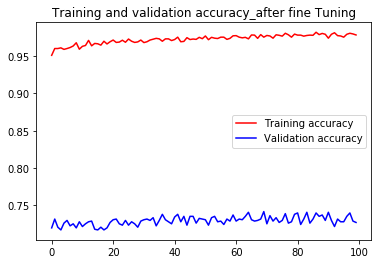

In [17]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy_after fine Tuning')
plt.legend(loc=0)
plt.savefig(Base_dir+"TRAINING_PLOT_FILE_after_fineTune.png", bbox_inches='tight')

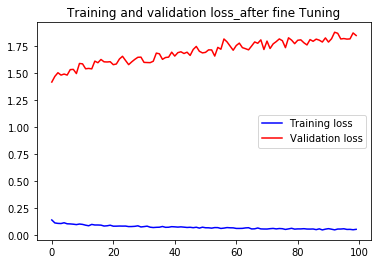

In [18]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss_after fine Tuning')
plt.legend()
plt.savefig(Base_dir+"VALIDATION_PLOT_FILE_with_finetune.png", bbox_inches='tight')

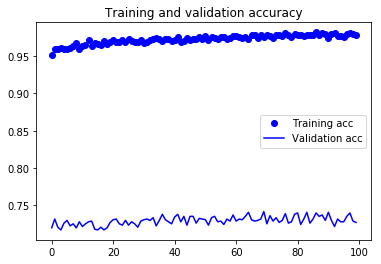

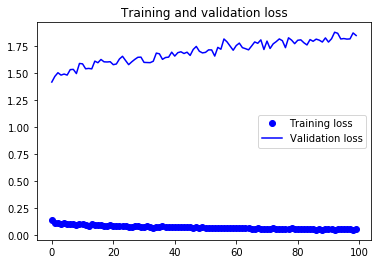

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

model = load_model(Base_dir+'skin_net_after_fineTuning050.hdf5')
Y_pred = model.predict_generator(validation_generator, validation_generator.samples//validation_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ["Acne-Rosacea", "Basal cell carcinoma"," Hair Loss Alopecia and other Hair Diseases",
             " Herpes"," Melanoma Skin Cancer Nevi and Moles",
            " Nail Fungus and other Nail Disease" , "Urticaria Hives"," Vasculitis"," Warts","seborrheic-keratoses"]
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[85  0  2  7  2  0  1  6  4  3]
 [ 7 64  0 14  5  1  0  8  2  9]
 [ 0  0 85  0  2 21  0  0  2  0]
 [ 8  2  3 77  2  4  0 10  4  0]
 [ 0  2  5  2 87  2  0  1  5  6]
 [ 0  0  9  1  0 89  0  2  8  1]
 [ 4  0  0  6  1  0 90  7  2  0]
 [ 3  1  2 13  4  2  6 71  7  1]
 [ 3  3  2  2  4  1  0  3 89  3]
 [ 4  5  7  2 14  2  0  3 10 63]]
Classification Report
                                             precision    recall  f1-score   support

                               Acne-Rosacea       0.75      0.77      0.76       110
                       Basal cell carcinoma       0.83      0.58      0.68       110
 Hair Loss Alopecia and other Hair Diseases       0.74      0.77      0.76       110
                                     Herpes       0.62      0.70      0.66       110
        Melanoma Skin Cancer Nevi and Moles       0.72      0.79      0.75       110
         Nail Fungus and other Nail Disease       0.73      0.81      0.77       110
                            Urtica

Saving 12PeriungualWart.jpg to 12PeriungualWart.jpg
[1.8924947e-33 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
The predicted disease found to be  Warts


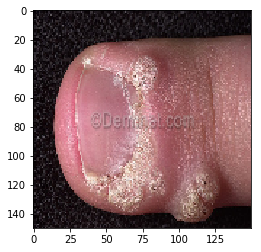

In [0]:
from keras.models import load_model
from google.colab import files
from keras.preprocessing import image
import numpy as np
from matplotlib.pyplot import imshow
from keras.applications.imagenet_utils import preprocess_input
import scipy.misc

model = load_model(Base_dir+'skin_net_after_fineTuning15.hdf5')
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
CATEGORIES =["Acne-Rosacea", "Basal cell carcinoma"," Hair Loss Alopecia and other Hair Diseases",
             " Herpes"," Melanoma Skin Cancer Nevi and Moles",
            " Nail Fungus and other Nail Disease" , "Urticaria Hives"," Vasculitis"," Warts","seborrheic-keratoses"]
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  #print('Input image shape:', x.shape)
  
  images = np.vstack([x])
  classes = model.predict(images)#, batch_size=10)
  #print(fn)
  
  print(classes[0])
  maximum=0.9
  for i,value in enumerate(classes[0]):
    if value>maximum:
      index=i
  print("The predicted disease found to be "+CATEGORIES[index]) 
  #print(type(CATEGORIES[int(classes[0][0])]))  
  
 

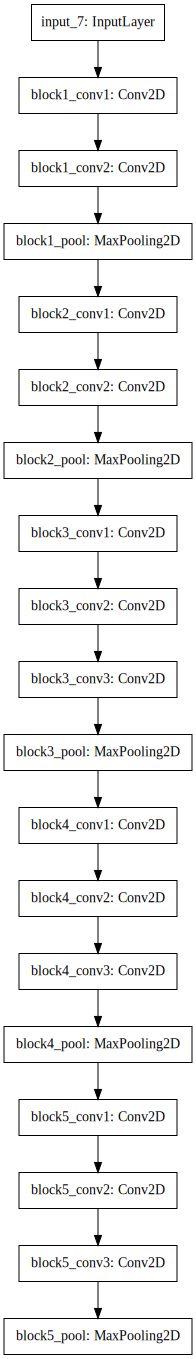

In [0]:
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
%matplotlib inline
plot_model(pre_trained_model, to_file=Base_dir+'model.png')
SVG(model_to_dot(pre_trained_model).create(prog='dot', format='svg'))


In [0]:
import cv2
import tensorflow as tf

CATEGORIES =["Acne-Rosacea", "Basal cell carcinoma"," Hair Loss Alopecia and other Hair Diseases",
             " Herpes"," Melanoma Skin Cancer Nevi and Moles",
            " Nail Fungus and other Nail Disease" , "Urticaria Hives"," Vasculitis"," Warts","seborrheic-keratoses"]
uploaded = files.upload()


def prepare(filepath):
    IMG_SIZE = 50  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("64X3-Cnn.model")

prediction = model.predict([prepare('rash30.jpg')])
print(int(prediction))  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])